In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler

In [64]:
df = pd.read_csv("cleaned_df.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,avg_Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,11,5.5
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,11,10.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12,12.5
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14,14.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,13,12.0


In [65]:
df["Mark"] = df["G3"].apply(lambda x: "A" if x >=17 else "B" if x >= 15 else "C" if x >= 12 else "D" if x >= 11 else "F" )
df.drop("G3",axis=1)
X,y = df.drop("Mark",axis=1),df["Mark"]

# Label Encoder :
When the categorical feature is nominal or lacks a clear order, employ Label Encoder

In [66]:
df_copy = df.copy()
binary_encoder = LabelEncoder()
# These are the columns affecting the target from our hypothesis testing
columns = ['school', 'sex', 'address', 'schoolsup', 'higher', 'internet']
for col in columns:
    df_copy[f'{col}2'] = binary_encoder.fit_transform(df[f'{col}'])
df_copy.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,absences,G3,avg_Grade,Mark,school2,sex2,address2,schoolsup2,higher2,internet2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,11,5.5,D,0,0,1,1,1,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,2,11,10.0,D,0,0,1,0,1,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,6,12,12.5,C,0,0,1,1,1,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,0,14,14.0,C,0,0,1,0,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,0,13,12.0,C,0,0,1,0,1,0


In [67]:
columns2=[f"{c}2"for c in columns]
# These features have strong correlation with our targeet variable
columns2.extend(['avg_Grade',"Dalc","goout"])
columns2

['school2',
 'sex2',
 'address2',
 'schoolsup2',
 'higher2',
 'internet2',
 'avg_Grade',
 'Dalc',
 'goout']

In [68]:
X = df_copy[columns2]
y = df_copy['Mark']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
print ("Number of columns used : ", X_test.shape[1])
print ("Number of rows used : ", X_test.shape[0])

Number of columns used :  9
Number of rows used :  93


Logistic Regression handles categorical values unlike linear regression. It employs a sigmoid function to transform the relationship between independent variables and the predicted outcome into probabilities ranging from 0 to 1.

### Scale the Data
Scaling the features can help improve the convergence of logistic regression. You can use StandardScaler or MinMaxScaler from scikit-learn to scale your features.

### Increase max_iter
You can increase the `max_iter` parameter of the logistic regression model. This parameter controls the maximum number of iterations allowed for the model to converge. Setting it to a higher value may help the model converge.


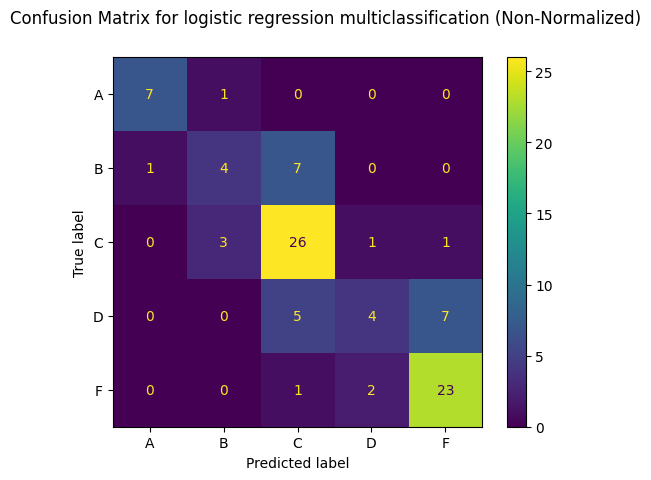

Test Accuracy: 0.6881720430107527
Train Accuracy: 0.7580645161290323
Classification Report: 
               precision    recall  f1-score   support

           A       0.88      0.88      0.88         8
           B       0.50      0.33      0.40        12
           C       0.67      0.84      0.74        31
           D       0.57      0.25      0.35        16
           F       0.74      0.88      0.81        26

    accuracy                           0.69        93
   macro avg       0.67      0.64      0.63        93
weighted avg       0.67      0.69      0.66        93



In [75]:
def Logistic_Regression_Classification(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_scaled, y_train)
    
    y_pred_test = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_train_scaled)
    
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    report = classification_report(y_test, y_pred_test)
    
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
    disp.figure_.suptitle("Confusion Matrix for logistic regression multiclassification (Non-Normalized)")
    plt.show()
    
    return report, test_accuracy, train_accuracy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
report, test_accuracy, train_accuracy = Logistic_Regression_Classification(X_train, X_test, y_train, y_test)
print("Test Accuracy:", test_accuracy)
print("Train Accuracy:", train_accuracy)
print("Classification Report: \n", report)


Naïve bayes model assumes independence between features given the class label. Despite its simplicity, It performs well with highdimensional data

In [72]:
def Naive_Bayes_Regression_Classification(X,y) :

    nb_classifier = GaussianNB()
    nb_classifier.fit(X_train, y_train)
    
    y_pred_test = nb_classifier.predict(X_test)
    y_pred_train = nb_classifier.predict(X_train)
    
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    report = classification_report(y_test,y_pred_test)
    return report, test_accuracy, train_accuracy

report,test_accuracy, train_accuracy = Naive_Bayes_Regression_Classification(X,y)
print("Test Accuracy:", test_accuracy)
print("Train Accuracy:", train_accuracy)
print("Classification Report: \n", report)

Test Accuracy: 0.3870967741935484
Train Accuracy: 0.41397849462365593
Classification Report: 
               precision    recall  f1-score   support

           A       0.00      0.00      0.00         8
           B       0.21      1.00      0.34        12
           C       0.57      0.13      0.21        31
           D       0.25      0.06      0.10        16
           F       0.79      0.73      0.76        26

    accuracy                           0.39        93
   macro avg       0.36      0.38      0.28        93
weighted avg       0.48      0.39      0.34        93



C:\Users\omarw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\omarw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\omarw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

KNN identifies the 'k' data points nearest to the new, unclassified data point using a distance measure (e.g., Euclidean distance) from the training set. Optimal performance in KNN necessitates selecting an appropriate 'k' value and ensuring high-quality training data.

Best Classification Report for k = 17:
              precision    recall  f1-score   support

           A       0.88      0.88      0.88         8
           B       0.64      0.58      0.61        12
           C       0.72      0.74      0.73        31
           D       0.54      0.44      0.48        16
           F       0.79      0.88      0.84        26

    accuracy                           0.72        93
   macro avg       0.71      0.70      0.71        93
weighted avg       0.71      0.72      0.71        93

Test Accuracy: 0.7204301075268817
Train Accuracy: 0.7634408602150538
----------------------------------------


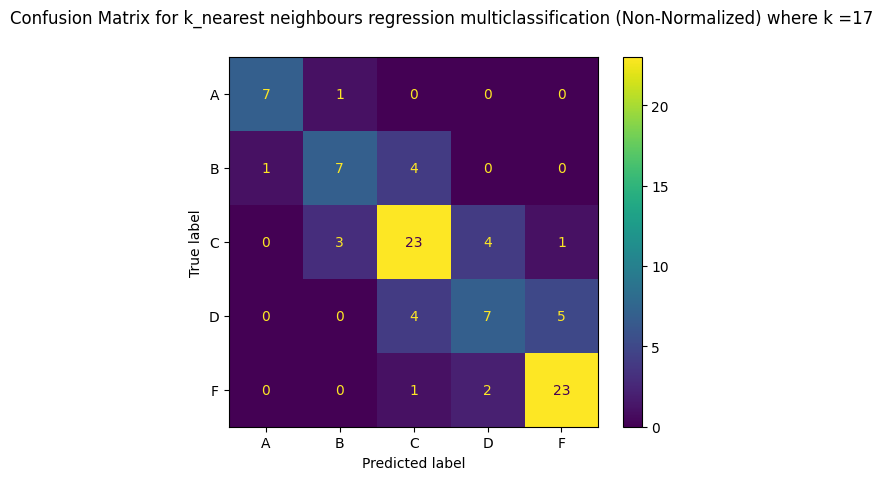

In [77]:
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def k_nearest_neighbors_classifier(X_train, X_test, y_train, y_test):
    neighbors = list(range(1, 27, 2))
    best_accuracy = 0
    best_k = None
    best_test_accuracy = None
    best_train_accuracy = None
    best_report = None

    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred_test = knn.predict(X_test)
        y_pred_train = knn.predict(X_train)
        test_accuracy = accuracy_score(y_test, y_pred_test)
        train_accuracy = accuracy_score(y_train, y_pred_train)
        
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_k = k
            best_test_accuracy = test_accuracy
            best_train_accuracy = train_accuracy
            best_report = classification_report(y_test, y_pred_test)

    print(f"Best Classification Report for k = {best_k}:\n{best_report}\nTest Accuracy: {best_test_accuracy}\nTrain Accuracy: {best_train_accuracy}\n{'-'*40}")

    # Selecting the best k based on accuracy
    best_knn = KNeighborsClassifier(n_neighbors=best_k)
    best_knn.fit(X_train, y_train)

    # Generating confusion matrix for the best k
    disp = ConfusionMatrixDisplay.from_estimator(best_knn, X_test, y_test)
    disp.figure_.suptitle(f"Confusion Matrix for k_nearest neighbours regression multiclassification (Non-Normalized) where k ={best_k}")
    plt.show()

k_nearest_neighbors_classifier(X_train, X_test, y_train, y_test)